## Sentiment Analysis in Python
In this notebook we will be doing some sentiment analysis in python using a social media sentiment dataset from Kaggle, and the technique will be 
1. VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach

## Step 0. Read in Data and NLTK Basics

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
import seaborn as sns
import nltk

In [2]:
# Reading in data
df = pd.read_csv("sentimentdataset.csv")

In [3]:
df.head()

,Id,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,2023-01-15 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [4]:
df['Text'].values[0]

' Enjoying a beautiful day at the park!              '

In [5]:
print(df.shape)

(732, 13)


## Quick EDA

<Axes: title={'center': 'Count of Reviews by Platforms'}, xlabel='Platform'>

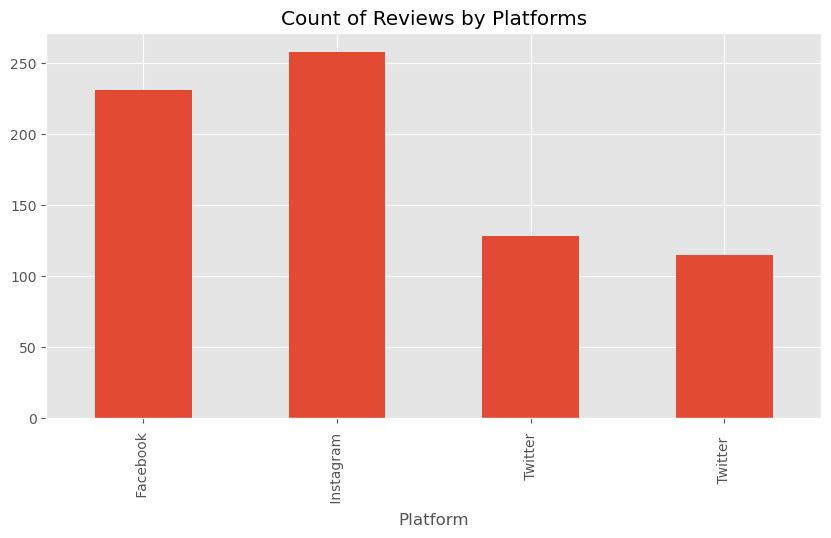

In [6]:
df['Platform'].value_counts().sort_index().plot(kind='bar', title= 'Count of Reviews by Platforms',
                                               figsize=(10,5))

# Basic NLTK

In [7]:
example = df['Text'][50]
print (example)

 Starting a new fitness challenge tomorrow! 💪     


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabriela\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
tokens = nltk.word_tokenize(example)
tokens[:5]

['Starting', 'a', 'new', 'fitness', 'challenge']

In [10]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gabriela\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
tagged=nltk.pos_tag(tokens)
tagged[:5]

[('Starting', 'VBG'),
 ('a', 'DT'),
 ('new', 'JJ'),
 ('fitness', 'NN'),
 ('challenge', 'NN')]

## Step 1. VADER Sentiment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
This uses a "bag of words" approach:
1. Stop words are removed
2. Each word is scored and combined to a total score


In [12]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gabriela\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

In [14]:
sia

In [15]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.4003}

In [16]:
# Run the polarity score on the entire dataset
from textblob import TextBlob

In [17]:
# Create a new DataFrame for sentiment scores
sentiment_df = pd.read_csv("sentimentdataset.csv")
sentiment_df

,Id,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,2023-01-15 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,732,Collaborating on a science project that receiv...,2017-08-18 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,733,Attending a surprise birthday party organized ...,2018-06-22 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,734,Successfully fundraising for a school charity ...,2019-04-05 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,735,"Participating in a multicultural festival, cel...",2020-02-29 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20


In [18]:
# Calculate sentiment scores and add them to the sentiment DataFrame
sentiment_df['compound'] = df['Text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
sentiment_df['positive'] = df['Text'].apply(lambda x: sia.polarity_scores(str(x))['pos'])
sentiment_df['neutral'] = df['Text'].apply(lambda x: sia.polarity_scores(str(x))['neu'])
sentiment_df['negative'] = df['Text'].apply(lambda x: sia.polarity_scores(str(x))['neg'])

In [19]:
# Display the sentiment DataFrame
print("Sentiment DataFrame:")
print(sentiment_df)

Sentiment DataFrame:
      Id                                               Text         Timestamp  \
0      0   Enjoying a beautiful day at the park!        ...  2023-01-15 12:30   
1      1   Traffic was terrible this morning.           ...   2023-01-15 8:45   
2      2   Just finished an amazing workout! 💪          ...  2023-01-15 15:45   
3      3   Excited about the upcoming weekend getaway!  ...  2023-01-15 18:20   
4      4   Trying out a new recipe for dinner tonight.  ...  2023-01-15 19:55   
..   ...                                                ...               ...   
727  732  Collaborating on a science project that receiv...  2017-08-18 18:20   
728  733  Attending a surprise birthday party organized ...  2018-06-22 14:15   
729  734  Successfully fundraising for a school charity ...  2019-04-05 17:30   
730  735  Participating in a multicultural festival, cel...  2020-02-29 20:45   
731  736  Organizing a virtual talent show during challe...  2020-11-15 15:15   

      

In [24]:
# Merge the sentiment DataFrame with the original df based on the identifier
merged_df = pd.merge(df, sentiment_df, how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)


Merged DataFrame:
      Id                                               Text         Timestamp  \
0      0   Enjoying a beautiful day at the park!        ...  2023-01-15 12:30   
1      1   Traffic was terrible this morning.           ...   2023-01-15 8:45   
2      2   Just finished an amazing workout! 💪          ...  2023-01-15 15:45   
3      3   Excited about the upcoming weekend getaway!  ...  2023-01-15 18:20   
4      4   Trying out a new recipe for dinner tonight.  ...  2023-01-15 19:55   
..   ...                                                ...               ...   
727  732  Collaborating on a science project that receiv...  2017-08-18 18:20   
728  733  Attending a surprise birthday party organized ...  2018-06-22 14:15   
729  734  Successfully fundraising for a school charity ...  2019-04-05 17:30   
730  735  Participating in a multicultural festival, cel...  2020-02-29 20:45   
731  736  Organizing a virtual talent show during challe...  2020-11-15 15:15   

        

In [25]:
merged_df.head()

,Id,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,compound,positive,neutral,negative
0,0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,0.8221,0.655,0.345,0.000
1,1,Traffic was terrible this morning. ...,2023-01-15 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,-0.4767,0.000,0.563,0.437
2,2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,0.6239,0.506,0.494,0.000
3,3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,0.4003,0.350,0.650,0.000
4,4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,0.0000,0.000,1.000,0.000


## Plot VADER Results

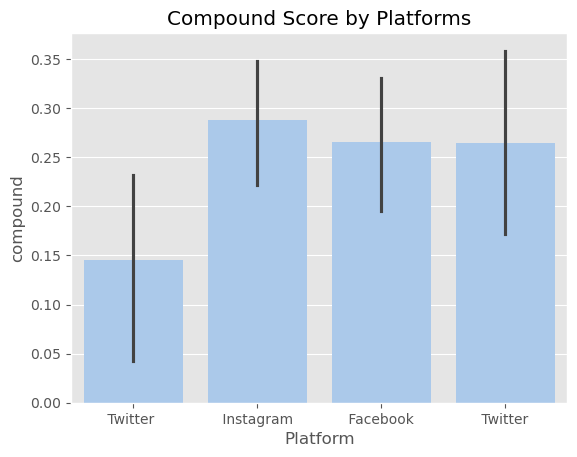

In [31]:
ax = sns.barplot (data = merged_df, x='Platform', y='compound')
ax.set_title('Compound Score by Platforms')
plt.show()

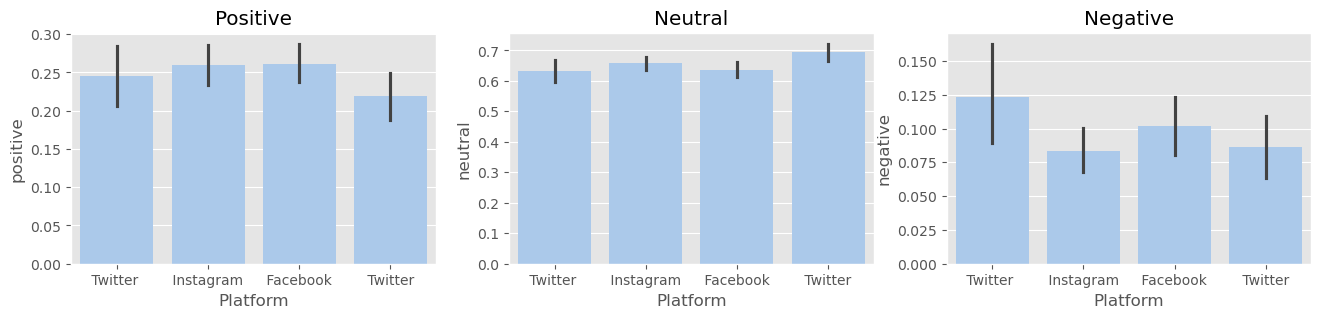

In [30]:
fig, axs = plt.subplots(1,3, figsize=(16,3))
sns.barplot(data = merged_df, x='Platform', y='positive', ax=axs[0])
sns.barplot(data = merged_df, x='Platform', y='neutral', ax=axs[1])
sns.barplot(data = merged_df, x='Platform', y='negative', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()

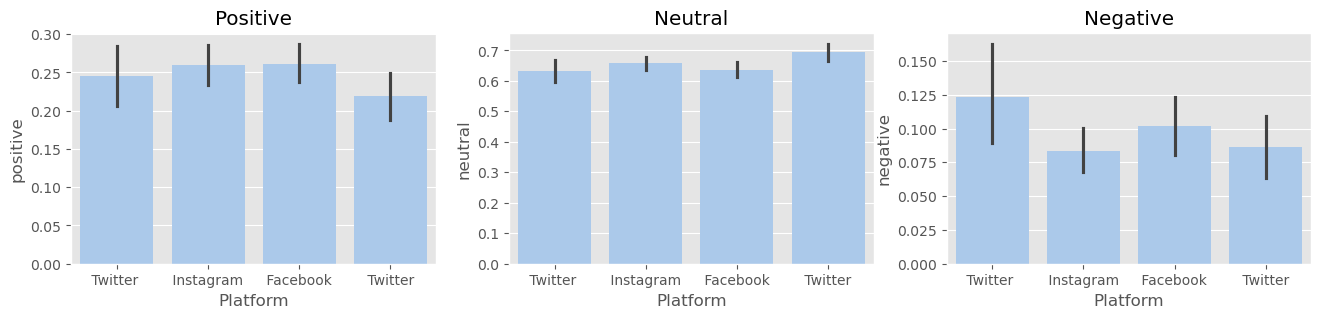

In [30]:
fig, axs = plt.subplots(1,3, figsize=(16,3))
sns.barplot(data = merged_df, x='Platform', y='positive', ax=axs[0])
sns.barplot(data = merged_df, x='Platform', y='neutral', ax=axs[1])
sns.barplot(data = merged_df, x='Platform', y='negative', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()

## Brief explanation

In [ ]:
Sentiment analysis, a powerful tool in natural language processing, enables the exploration of a variety of datasets using Python. This project used a social media sentiment dataset to perform a sentiment analysis. Different Python packages, such as pandas, numpy, matplolib, seaborn, and Vader, were used to accomplish this for data analysis and visualization:
1. The dataset was checked to look for discrepancies and errors.
2. A fundamental NLKT analysis was done 
3. I used the Vader sentiment score to help with the data classification based on reviews and used the bag of words approach to remove stop words, such as 'but, 'and' and so on.
4. A  new dataset was created, merging the previous one with the sentiment analysis results.
5. The results from the sentiment analysis were plotted using seaborn to visualize them. 
6. As a final results we have three plots showing positive, negative and neutral sentiments based on the different platforms. Where we would see that Twitter has the hightest negative sentiments.
